In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv('input/train.csv')
df_test = pd.read_csv('input/test.csv')

In [4]:
display(df_train.info())
display(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
def check_missing(df):
    return (df.isna().sum() / df.shape[0]).round(4) * 100

In [6]:
check_missing(df_train)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [7]:
from sklearn.impute import SimpleImputer

df_temp = df_train.copy()

embarked_imputer = SimpleImputer(strategy='most_frequent')
embarked_imputer.fit(df_temp[['Embarked']])
df_temp[['Embarked']] = embarked_imputer.transform(df_temp[['Embarked']])

check_missing(df_temp)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.00
dtype: float64

In [8]:
print(
    df_temp.groupby('Pclass', as_index=False)
    .agg(median=('Age', 'median'))
)

   Pclass  median
0       1    37.0
1       2    29.0
2       3    24.0


In [9]:
df_train.groupby('Pclass')['Age'].transform('median')

0      24.0
1      37.0
2      24.0
3      37.0
4      24.0
       ... 
886    29.0
887    37.0
888    24.0
889    37.0
890    24.0
Name: Age, Length: 891, dtype: float64

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomAgeImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.median_ages = None

    def fit(self, X, y=None):
        self.median_ages = X.groupby('Pclass')['Age'].transform('median')
        return self

    def transform(self, X):
        X = X.copy()
        X['Age'] = X['Age'].fillna(self.median_ages)
        return X[['Age']]

    def get_feature_names_out(self, input_features=None):
        return ['Age']

age_imputer = CustomAgeImputer()
age_imputer.fit(df_temp[['Age', 'Pclass']])
df_temp[['Age']] = age_imputer.transform(df_temp[['Age']])

print(check_missing(df_temp))

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.0
dtype: float64


In [11]:
class CabinTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['Has_Cabin'] = X_copy['Cabin'].notna().astype(int)
        return X_copy[['Has_Cabin']]

    def get_feature_names_out(self, input_features=None):
        return ['Has_Cabin']

cabin_transformer = CabinTransformer()
cabin_transformer.fit(df_temp[['Cabin']])
df_temp[['Has_Cabin']] = cabin_transformer.transform(df_temp[['Cabin']])
df_temp = df_temp.drop(columns=['Cabin'])

df_temp.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1


In [12]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Has_Cabin    891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [13]:
(
    df_temp['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    .value_counts()
)

Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [14]:
class NameTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 name_col='Name', 
                 age_col='Age', 
                 title_col='Title',
                 title_thres='Master'):
        self.name_col = name_col
        self.age_col = age_col
        self.title_col = title_col
        self.title_thres = title_thres

    def _clean_title(self, title):
        if title in ['Ms', 'Mlle']: return 'Miss'
        if title in ['Mme']: return 'Mrs'
        return title

    def fit(self, X, y=None):
        X_fit = X.copy()
        titles = (
            X_fit[self.name_col]
            .str.extract(r' ([A-Za-z]+)\.', expand=False)
            .apply(self._clean_title)
        )
        counts = titles.value_counts()
        threshold = counts.get(self.title_thres, 0)
        self.rare_titles_ = counts[counts < threshold].index.tolist()
        return self

    def transform(self, X):
        X_transformed = X.copy()
        titles = (
            X_transformed[self.name_col]
            .str.extract(r' ([A-Za-z]+)\.', expand=False)
            .apply(self._clean_title)
        )
        X_transformed[self.title_col] = titles.replace(self.rare_titles_, 'Rare')
        return X_transformed[[self.title_col]]

    def get_feature_names_out(self, input_features=None):
        return [self.title_col]


name_transformer = NameTransformer()
name_transformer.fit(df_temp)
df_temp['Title'] = name_transformer.transform(df_temp)
df_temp['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

In [15]:
class FamilySizeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transform = X.copy()
        X_transform['FamilySize'] = X_transform['SibSp'] + X_transform['Parch'] + 1
        return X_transform[['FamilySize']]

    def get_feature_names_out(self, input_features=None):
        return ['FamilySize']

famsize_transformer = FamilySizeTransformer()
df_temp['FamilySize'] = famsize_transformer.transform(df_temp)
df_temp[['SibSp', 'Parch', 'FamilySize']].head()

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [16]:
df_temp = df_temp.drop(columns=['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'])
df_temp.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Title,FamilySize
0,0,3,male,22.0,7.2500,S,0,Mr,2
1,1,1,female,38.0,71.2833,C,1,Mrs,2
2,1,3,female,26.0,7.9250,S,0,Miss,1
3,1,1,female,35.0,53.1000,S,1,Mrs,2
4,0,3,male,35.0,8.0500,S,0,Mr,1


In [22]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.set_output(transform='pandas')

ohe.fit(df_temp[['Sex', 'Embarked', 'Title']])
df_ohe = ohe.transform(df_temp[['Sex', 'Embarked', 'Title']])

In [24]:
df_temp = pd.concat(
    [
        df_temp.drop(columns=['Sex', 'Embarked', 'Title']),
        df_ohe,
    ],
    axis=1
)

In [26]:
print(df_temp.shape)
display(df_temp.head())

(891, 16)


,Survived,Pclass,Age,Fare,Has_Cabin,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,22.0,7.2500,0,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,1,38.0,71.2833,1,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,3,26.0,7.9250,0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,1,35.0,53.1000,1,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,3,35.0,8.0500,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [28]:
from sklearn.model_selection import train_test_split

X = df_temp.drop(columns=['Survived'])
y = df_temp['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (712, 15)
X_test: (179, 15)
y_train: (712,)
y_test: (179,)


In [30]:
df_train['Survived'].value_counts() / df_train.shape[0]

Survived
0    0.616162
1    0.383838
Name: count, dtype: float64

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, max_iter=10000)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [33]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.8324022346368715


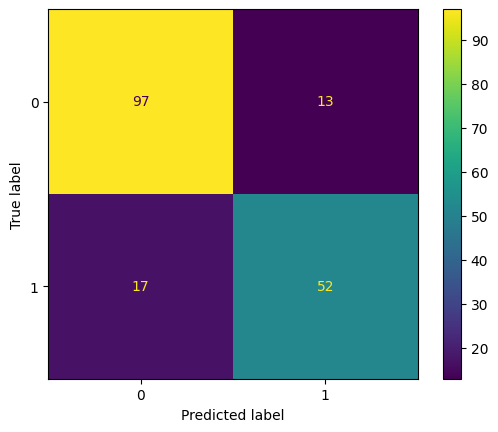

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_disp.plot()

In [36]:
clf_report = classification_report(y_test, y_pred)

print(clf_report)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.80      0.75      0.78        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [37]:
print(cm)

[[97 13]
 [17 52]]


In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy score for RF: {accuracy_rf}')

Accuracy score for RF: 0.8044692737430168


              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



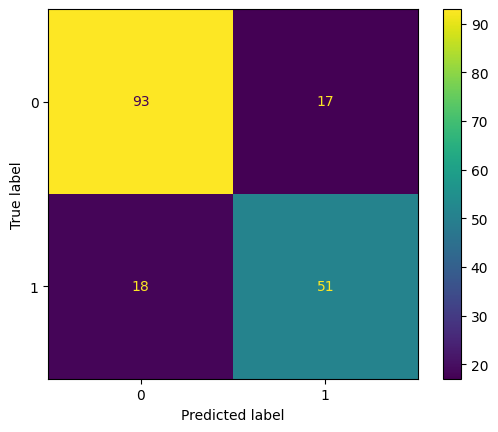

In [39]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0, 1])
cm_disp_rf.plot()

clf_report_rf = classification_report(y_test, y_pred_rf)
print(clf_report_rf)

In [40]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_clf, 
    param_grid={
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15],
        'min_samples_leaf': [1, 2, 4]
    },
    cv=5,
    scoring='accuracy',
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=300; total time=   0.4s
[CV] END ..max_depth=5, min_samples_leaf=1, n_e

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 2, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [42]:
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=15, min_samples_leaf=4, random_state=42)


              precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.80      0.68      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



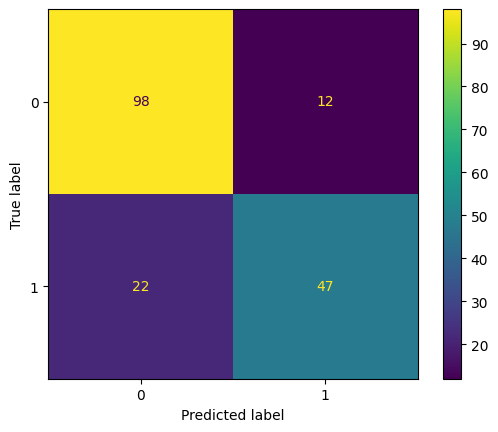

In [44]:
def create_report(y_true, y_pred, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    cm_disp.plot()

    clf_report = classification_report(y_true, y_pred)
    print(clf_report)

y_pred = grid_search.predict(X_test)
create_report(y_test, y_pred, labels=df_train['Survived'].unique())